In [29]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video


resolution = 30 #pixels/micron

freq = 1/1.55 # We work typically at 1550 nm wavelength (1.55 micron)
sio2 = mp.Medium(index=1.444) # glass surrounding waveguide

cell = mp.Vector3(16,8,0)
geometry = [mp.Block(mp.Vector3(mp.inf,0.5,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

# sources = [
#     mp.EigenModeSource(src=mp.ContinuousSource(frequency=freq, width=20),
#         component=mp.Ez,
#         center=mp.Vector3(-4,0),
#         # direction = mp.X,
#         size=mp.Vector3(0,1)                                     
#     )
# ]

# sources = [
#     mp.EigenModeSource(
#         src=mp.GaussianSource(wavelength=2 * (11**0.5), width=10),
#         component=mp.Ez,
#         center=mp.Vector3(-7, -3.5),
#         size=mp.Vector3(0, 1),
#     )
# ]

n = 3.464
# th = np.radians(20)
th = np.radians(0)
k_point = mp.Vector3(freq * n).rotate(mp.Vector3(z=1), th)


sources = [
    mp.EigenModeSource(
        
        src=mp.GaussianSource(freq,fwidth=0.2*freq, width=2),
            center=mp.Vector3(-6,0),
            size=mp.Vector3(0,1),
            component=mp.Ez,
            direction=mp.NO_DIRECTION,
            eig_kpoint= k_point
    )
]


pml_layers = [mp.PML(1.0)]



/Users/JohnMihal/anaconda3/envs/mp/lib/python3.11/site-packages/meep/source.py:592: RuntimeWarning: EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.
  warnings.warn(


In [30]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    default_material=sio2)

fluxEnd = sim.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=5),size=mp.Vector3(y=1)), 
                            decimation_factor=0)

fluxStart = sim.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=-3),size=mp.Vector3(y=1)), 
                            decimation_factor=0)



In [31]:
f = plt.figure(dpi=150)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(until = 150)

# sim.run(mp.at_every(0.5, Animate), until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt=mp.Vector3(x=5), decay_by=1e-2))
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000265121 s


Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.115203 s
-----------
MPB solved for frequency_1(2.23484,0,0) = 0.683444 after 24 iters
MPB solved for frequency_1(2.09819,0,0) = 0.645184 after 7 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 3 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 1 iters


FloatProgress(value=0.0, description='0% done ', max=150.0)

run 0 finished at t = 150.0 (9000 timesteps)


In [32]:
filename = "straight_waveguide.mp4"
fps = 10
Animate.to_mp4(fps, filename)
Video(filename)

Generating MP4...


     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


<Axes: xlabel='X', ylabel='Y'>

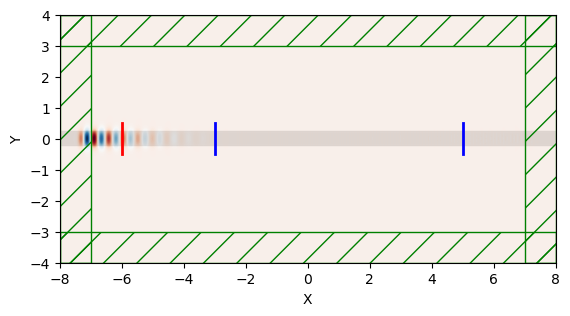

In [33]:
sim.plot2D(fields=mp.Ez, 
           field_parameters={'alpha':0.9})

In [34]:
res = sim.get_eigenmode_coefficients(fluxStart,bands=[1])
print("flux: ")
print(abs(res.alpha[0,0,0])**2)
print("Res: ")
print(res)

import pickle

dbfile = open('examplePickle', 'ab')
pickle.dump(res, dbfile)
dbfile.close()



MPB solved for frequency_1(2.2349,0,0) = 0.683463 after 24 iters
MPB solved for frequency_1(2.09819,0,0) = 0.645184 after 7 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 3 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.098108,-0.000000,0.000000)
flux: 
15.262227052115426
Res: 
EigCoeffsResult(alpha=array([[[-2.46308832+3.03239558j,  0.0342156 -0.04232735j]]]), vgrp=array([0.27982585]), kpoints=[Vector3<2.0981083209074227, 0.0, 0.0>], kdom=[Vector3<2.0981083209074227, -0.0, 0.0>], cscale=array([0.50001279]))


In [35]:
t = res.alpha[0][0][0]
print("t: ")
print(t)
print(abs(t)**2)


t: 
(-2.4630883206055527+3.0323955838597216j)
15.262227052115426


In [36]:
mp.get_fluxes(fluxStart)

[15.266747411245742]

In [37]:
sources[0]

In [38]:
sim.dump("sim-dump")


Dumped structure to file: sim-dump/structure.h5 (True)creating epsilon from file "sim-dump/structure.h5" (1)...

Dumped fields to file: sim-dump/fields.h5 (True)
creating fields output file "sim-dump/fields.h5" (1)...


In [39]:
sim2 = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    default_material=sio2)

fluxEnd = sim2.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=5),size=mp.Vector3(y=1)), 
                            decimation_factor=0)

fluxStart = sim2.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=-3),size=mp.Vector3(y=1)), 
                            decimation_factor=0)

sim2.load("sim-dump")

     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000166178 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.113155 s
-----------
reading epsilon from file "sim-dump/structure.h5" (1)...
Loaded structure from file: sim-dump/structure.h5 (True)
MPB solved for frequency_1(2.23484,0,0) = 0.683444 after 24 iters
MPB solved for frequency_1(2.09819,0,0) = 0.645184 after 7 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 3 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 1 iters
Loaded fields from file: sim-dump/fields.h5 (True)
reading fields from file "sim-dump/field

<Axes: xlabel='X', ylabel='Y'>

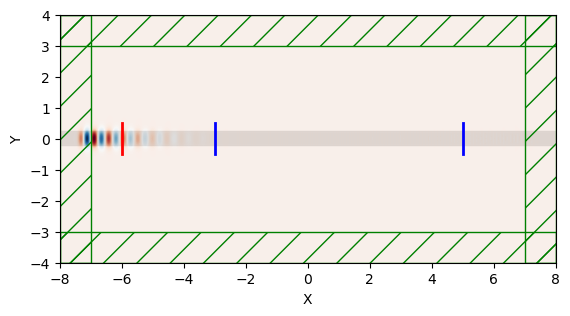

In [40]:
sim2.plot2D(fields=mp.Ez, 
           field_parameters={'alpha':0.9})




In [41]:
res = sim2.get_eigenmode_coefficients(fluxEnd,bands=[1])
print("res: ")
print(res)
t = res.alpha[0][0][0]
print("t squared: ")
print(np.abs(t)**2)
print("get fluxes: ")
mp.get_fluxes(fluxEnd)

MPB solved for frequency_1(2.2349,0,0) = 0.683463 after 24 iters
MPB solved for frequency_1(2.09819,0,0) = 0.645184 after 7 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 3 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.098108,-0.000000,0.000000)
res: 
EigCoeffsResult(alpha=array([[[0.+0.j, 0.+0.j]]]), vgrp=array([0.27982585]), kpoints=[Vector3<2.0981083209074227, 0.0, 0.0>], kdom=[Vector3<2.0981083209074227, -0.0, 0.0>], cscale=array([0.50001279]))
t squared: 
0.0
get fluxes: 


[0.0]

FloatProgress(value=150.0, description='0% done ', max=200.0, min=150.0)

on time step 9000 (time=150), 0.000481989 s/step
run 1 finished at t = 200.0 (12000 timesteps)
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


<Axes: xlabel='X', ylabel='Y'>

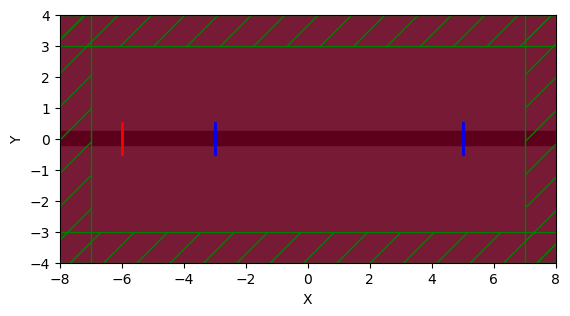

In [42]:
sim2.restart_fields()




# sim2.plot2D(fields=mp.Ez, 
#            field_parameters={'alpha':0.9})
sim.run(until = 50)
sim2.plot2D(fields=mp.Ez, 
           field_parameters={'alpha':0.9})